Q1. This data set contains details of a disease diagnostic parameter and the target variable is a
binary variable reflecting the fact whether the person has that disease or not. Apply necessary
data preprocessing .Construct Random Forest to predict whether new patient will have that
disease or not using Jupyter Notebook. choose following columns as independent variable in
dataset (Gender, Glucose, BP, Skin Thickness, Insulin, BMI, Age)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./SET 19-1.csv")
print(dataset)

     Age  BloodPressure  Glucose  Outcome  DiabetesPedigreeFunction  \
0     50             72      148        1                     0.627   
1     31             66       85        0                     0.351   
2     32             64      183        1                     0.672   
3     21             66       89        0                     0.167   
4     33             40      137        1                     2.288   
..   ...            ...      ...      ...                       ...   
763   63             76      101        0                     0.171   
764   27             70      122        0                     0.340   
765   30             72      121        0                     0.245   
766   47             60      126        1                     0.349   
767   23             70       93        0                     0.315   

     SkinThickness  Insulin  Pregnancies   BMI  
0               35        0            6  33.6  
1               29        0            1  26.6  


In [3]:
print(dataset.shape)

(768, 9)


In [5]:
dataset.isnull().sum()

Age                         0
BloodPressure               0
Glucose                     0
Outcome                     0
DiabetesPedigreeFunction    0
SkinThickness               0
Insulin                     0
Pregnancies                 0
BMI                         0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   Outcome                   768 non-null    int64  
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   SkinThickness             768 non-null    int64  
 6   Insulin                   768 non-null    int64  
 7   Pregnancies               768 non-null    int64  
 8   BMI                       768 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
X = dataset.iloc[:, [0,1,2,5,6,8]].values #iloc[rows,cols] [included:excluded)
Y = dataset.iloc[:,3].values

In [11]:
print(X)

[[ 50.   72.  148.   35.    0.   33.6]
 [ 31.   66.   85.   29.    0.   26.6]
 [ 32.   64.  183.    0.    0.   23.3]
 ...
 [ 30.   72.  121.   23.  112.   26.2]
 [ 47.   60.  126.    0.    0.   30.1]
 [ 23.   70.   93.   31.    0.   30.4]]


In [12]:
print(Y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state = 42)

In [14]:
print(X_train)

[[ 44.    0.  129.   30.    0.   39.9]
 [ 23.   86.  129.   20.  270.   35.1]
 [ 46.   82.   61.   28.    0.   34.4]
 ...
 [ 38.   86.  101.   37.    0.   45.6]
 [ 29.    0.  141.    0.    0.   42.4]
 [ 21.   96.  125.    0.    0.   22.5]]


In [15]:
print(X_test)

[[ 43.   58.   98.   33.  190.   34. ]
 [ 21.   75.  112.   32.    0.   35.7]
 [ 21.   64.  108.    0.    0.   30.8]
 ...
 [ 34.   72.  123.   45.  230.   33.6]
 [ 26.   50.   78.   32.   88.   31. ]
 [ 27.   72.  106.    0.    0.   25.8]]


In [16]:
print(Y_train)

[1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 1 0 1 

In [17]:
print(Y_test)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0]


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
Classifer_Random = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state= 0)
Classifer_Random.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [28]:
Y_pred = Classifer_Random.predict(X_test)
print(Y_pred)

[0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0]


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[99 24]
 [25 44]]


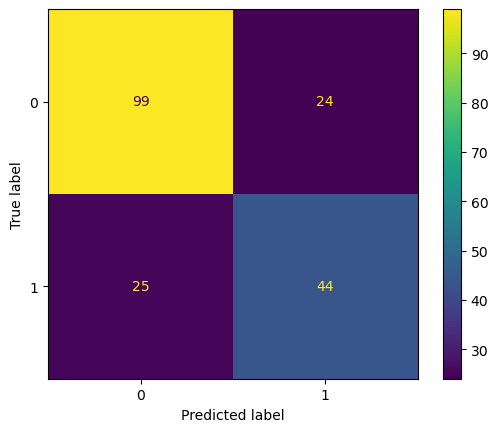

In [31]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print("Accuracy:%.2f" % (accuracy_score(Y_test,Y_pred)*100))

Accuracy:74.48
